In [2]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Breast_Cancer.csv")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 133.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 118.4 MB/s eta 0:00:00


In [14]:
# Mostrar las primeras filas para entender la estructura
print(df.head())

   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      1

In [31]:
# Verificar si hay valores nulos en las columnas necesarias
print(df[["Age", "Race", "Marital Status", "T Stage ","N Stage","6th Stage","differentiate","Grade","A Stage", "Tumor Size", "Estrogen Status", "Progesterone Status", "Regional Node Examined", "Reginol Node Positive", "Survival Months", "Status"]].isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [38]:
# Eliminar filas con valores nulos en las columnas necesarias
df_clean = df.dropna(subset=["Age", "Race", "Marital Status", "T Stage ","N Stage","6th Stage","differentiate",
                             "Grade","A Stage", "Tumor Size", "Estrogen Status", "Progesterone Status", "Regional Node Examined", 
                             "Reginol Node Positive", "Survival Months","Status"])

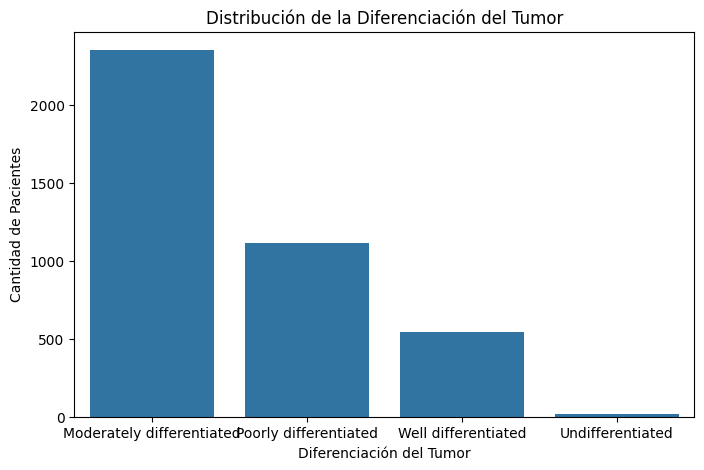

In [19]:
# Distribución de la Diferenciación del Tumor
plt.figure(figsize=(8, 5))
sns.countplot(x=df["differentiate"], order=df["differentiate"].value_counts().index)
plt.xlabel("Diferenciación del Tumor")
plt.ylabel("Cantidad de Pacientes")
plt.title("Distribución de la Diferenciación del Tumor")
plt.show()

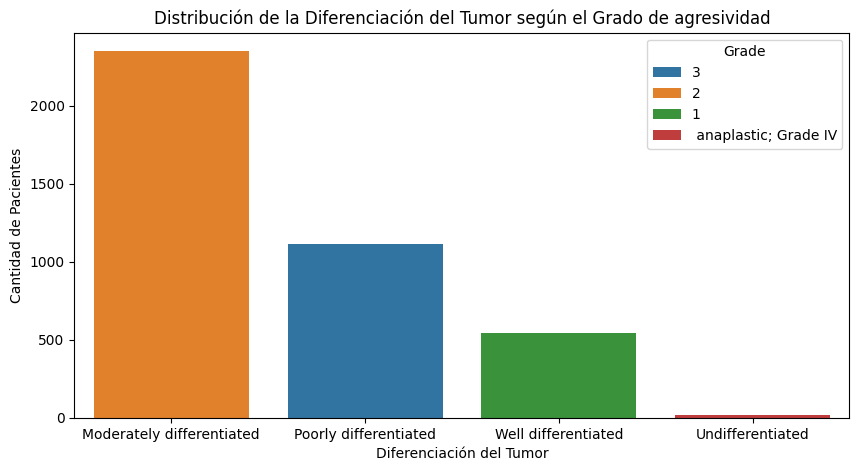

In [22]:
# Distribución de la Distribución del tumor en pacientes según el Grado, mientras más diferenciado, menos agresivo
plt.figure(figsize=(10, 5))
sns.countplot(x="differentiate", hue="Grade", data=df, order=df["differentiate"].value_counts().index)
plt.xlabel("Diferenciación del Tumor")
plt.ylabel("Cantidad de Pacientes")
plt.title("Distribución de la Diferenciación del Tumor según el Grado de agresividad")
plt.show()

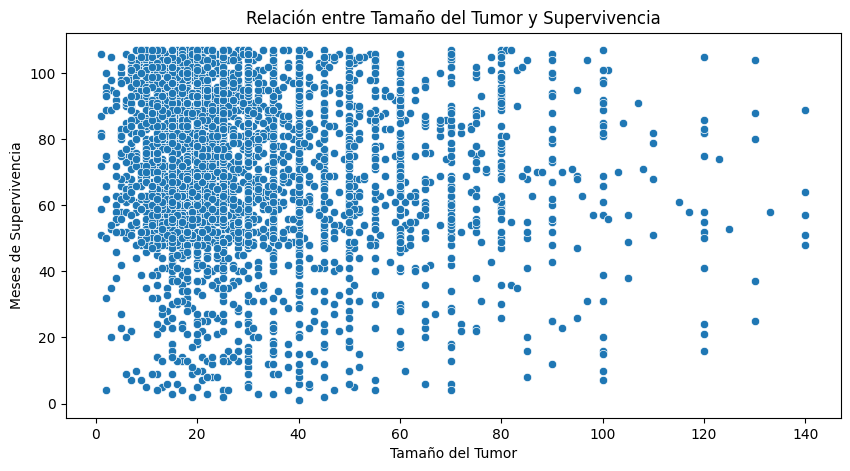

In [22]:
# Relación entre el Tamaño del Tumor y los Meses de Supervivencia
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Tumor Size"], y=df["Survival Months"])
plt.xlabel("Tamaño del Tumor")
plt.ylabel("Meses de Supervivencia")
plt.title("Relación entre Tamaño del Tumor y Supervivencia")
plt.show()

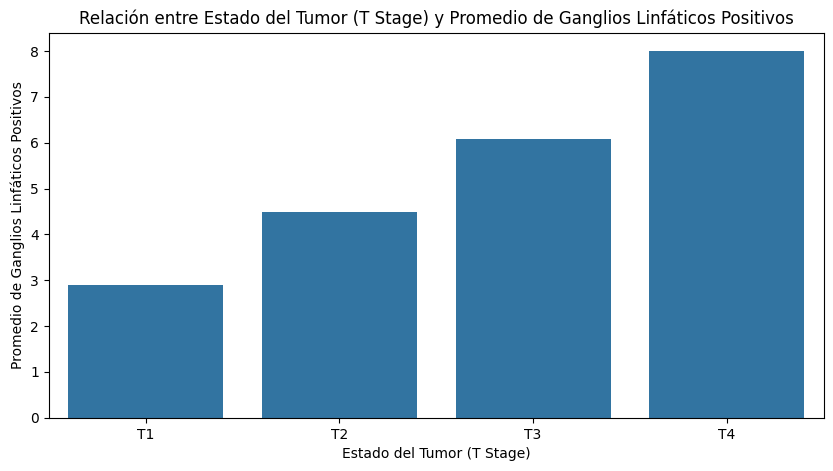

In [15]:
# Promedio de Ganglios Linfáticos Positivos por Estado del Tumor (T Stage)
avg_nodes_by_t_stage = df.groupby("T Stage ")["Reginol Node Positive"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_nodes_by_t_stage.index, y=avg_nodes_by_t_stage.values)
plt.xlabel("Estado del Tumor (T Stage)")
plt.ylabel("Promedio de Ganglios Linfáticos Positivos")
plt.title("Relación entre Estado del Tumor (T Stage) y Promedio de Ganglios Linfáticos Positivos")
plt.show()

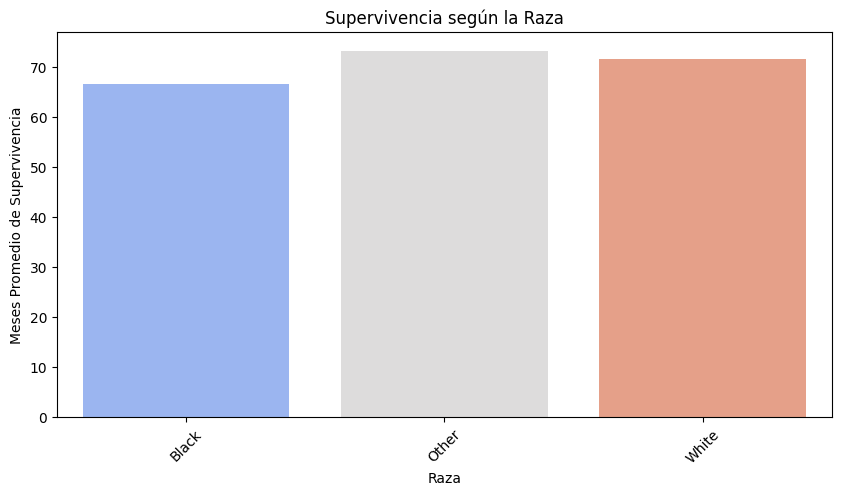

In [27]:
# Supervivencia Promedio según la Raza
survival_by_race = df.groupby("Race")["Survival Months"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=survival_by_race.index, y=survival_by_race.values, hue=survival_by_race.index, palette="coolwarm", legend=False)
plt.xlabel("Raza")
plt.ylabel("Meses Promedio de Supervivencia")
plt.title("Supervivencia según la Raza")
plt.xticks(rotation=45)
plt.show()